<a href="https://colab.research.google.com/github/ErSangram/capstone_03_Zomato_Restaurant_Clustering_And_Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis

#####**Project Type**- Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -** Sangram Naik

# **Project Summary -**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

The Zomato Restaurant Clustering and Sentiment Analysis Project is a machine learning project that involves clustering restaurants based on their features and performing sentiment analysis on customer reviews. The project uses unsupervised learning techniques to group similar restaurants and identifies patterns and similarities among them. Additionally, sentiment analysis is performed on the reviews of each restaurant to classify them as positive, negative, or neutral. The insights gained from this project can be useful for restaurant owners to understand customer preferences and improve their services accordingly.

# **GitHub Link -**

# **Problem Statement**

The restaurant industry is highly competitive and dynamic, with new restaurants constantly entering the market. Restaurant owners face the challenge of understanding customer preferences and meeting their expectations to stay relevant in the market. In this context, there is a need for a data-driven approach that can help restaurant owners gain insights into customer preferences and improve their services accordingly. The Zomato Restaurant Clustering and Sentiment Analysis Project aims to address this problem by leveraging machine learning techniques to cluster restaurants based on their features and perform sentiment analysis on customer reviews to identify areas of improvement.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [49]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visualization 
import seaborn as sns
sns.set(color_codes=True) 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
restro_df = pd.read_csv('/content/drive/MyDrive/Alma_projects/clustering_project_data/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Alma_projects/clustering_project_data/Zomato Restaurant reviews.csv')

### Dataset First View

In [3]:
restro_df.sample(5)

,Name,Links,Cost,Collections,Cuisines,Timings
91,Cascade - Radisson Hyderabad Hitec City,https://www.zomato.com/hyderabad/cascade-radis...,"1,800",NaN,"North Indian, Italian, Continental, Asian",24 Hours
97,Zega - Sheraton Hyderabad Hotel,https://www.zomato.com/hyderabad/zega-sheraton...,"1,750",NaN,"Asian, Sushi",12Noon to 2AM (Mon-Sun)
96,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun)
43,The Foodie Monster Kitchen,https://www.zomato.com/hyderabad/the-foodie-mo...,500,"Great Breakfasts, Late Night Restaurants, Best...","American, Wraps, Desserts",7 AM to 1 AM
99,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"


In [4]:
reviews_df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7798,Squeeze @ The Lime,Nimit Shah,Bill not given by the restaurant,4,"15 Reviews , 2 Followers",4/20/2018 22:38,0
4228,Karachi Cafe,Hardik Seth,A vintage themed cafe by the legendry Karachi ...,4,"8 Reviews , 201 Followers",1/29/2019 12:55,0
5316,Diners Pavilion,Sohani Nanda,This place is one of my favourites as it will ...,4,"8 Reviews , 1 Follower",3/20/2019 1:32,3
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1221,Absolute Sizzlers,Shanmukharo Bendi31,Absolute sizzlers it's not only sizzlers thay ...,5,1 Review,4/27/2019 19:01,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'A Restaurant Dataset contain {restro_df.shape[0]} rows and {restro_df.shape[1]} Columns')
print(f'A reviews Dataset contain {reviews_df.shape[0]} rows and {reviews_df.shape[1]} Columns')

A Restaurant Dataset contain 105 rows and 6 Columns
A reviews Dataset contain 10000 rows and 7 Columns


### Dataset Information

In [6]:
# Restaurant Dataset information
restro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
# reviews Dataset information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [8]:
# Restaurant Dataset Duplicate Value Count
len(restro_df[restro_df.duplicated()])

0

In [9]:
# reviews Dataset Duplicate Value Count
len(reviews_df[reviews_df.duplicated()])

36

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count from Restaurant Dataset
null_df = restro_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})
null_df

,Columns,Null_values
0,Collections,54
1,Timings,1
2,Name,0
3,Links,0
4,Cost,0
5,Cuisines,0


In [11]:
# Missing Values/Null Values Count from reviews Dataset
null_df = reviews_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})
null_df

,Columns,Null_values
0,Review,45
1,Reviewer,38
2,Rating,38
3,Metadata,38
4,Time,38
5,Restaurant,0
6,Pictures,0


### Dataset Observations.

We have two datasets in our project - "Zomato Restaurant names and Metadata.csv" and "Zomato Restaurant reviews.csv".

The "Zomato Restaurant names and Metadata.csv" dataset contains six columns: "Name", "Links", "Cost", "Collections", "Cuisines", and "Timings". There are 105 non-null values in each column except for "Collections" and "Timings", which have 54 and 1 non-null values, respectively.

The "Zomato Restaurant reviews.csv" dataset contains seven columns: "Restaurant", "Reviewer", "Review", "Rating", "Metadata", "Time", and "Pictures". There are 10,000 non-null values in the "Restaurant" and "Pictures" columns, while the "Reviewer", "Review", "Rating", "Metadata", and "Time" columns have 9962 non-null values.

Overall, these datasets contain valuable information about restaurants such as their names, cuisines, cost, and customer reviews. The information can be used to perform various analysis tasks such as sentiment analysis and clustering to gain insights into customer preferences and improve restaurant services.

## ***2. Understanding Your Variables***

In [12]:
# Restaurant Dataset Columns
restro_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [13]:
# reviews dataset columns
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [14]:
# Dataset Describe using description of the data with statistical turms.
restro_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [15]:
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

Variable Description of Restaurant Data

*  **Name** = Name of Restaurants
*  **Links** = URL Links of Restaurants 
*  **Cost** = Per person estimated cost of dining
*  **Collections** = Tagging of Restaurants with respect to Zomato categories
*  **Cuisines** = Cuisines served by restaurants 
*  **Timings** = Restaurant timings

Variable Description of Review Dataset

*  **Reviewer** = Name of the reviewer 
*  **review** = Review text 
*  **Rating** = Rating provided 
*  **MetaData** = Reviewer metadats-No of reviews and followers 
*  **Time** = Date and Time of Review 
*  **Pictures** = Number of pictures posted with review

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(restro_df.columns):
    a.append(i)
    b.append(restro_df[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,Name,105
1,Links,105
2,Cost,29
3,Collections,42
4,Cuisines,92
5,Timings,77


In [17]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(reviews_df.columns):
    a.append(i)
    b.append(reviews_df[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,Restaurant,100
1,Reviewer,7446
2,Review,9364
3,Rating,10
4,Metadata,2477
5,Time,9782
6,Pictures,36


## 3. ***Data Wrangling***

In [18]:
# Need to make data clean frist delete duplicate values from the dataset
reviews_df.drop_duplicates(inplace=True)

In [19]:
restro_df['Cost']

0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 105, dtype: object

In [20]:
# changing the data type of the cost varible
restro_df['Cost'] = restro_df['Cost'].str.replace(",","").astype('int64')

In [21]:
restro_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [22]:
restro_df['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [126]:
# extract Review_count and Followers from Metadata
reviews_df['Review_count'] = reviews_df['Metadata'].str.extract('(\d+) Review')
reviews_df['Followers'] = reviews_df['Metadata'].str.extract('(\d+) Follower')
     

In [23]:
# Define a function to count the number of words in a string separated by commas
def count_words(string):
    words = string.split(',')
    return len(words)

In [24]:
# Apply the 'count_words' function to the 'Cuisines' column of the DataFrame and store the result in a new 'cuisine_count' column
restro_df['cuisine_count'] = restro_df['Cuisines'].apply(count_words)

In [25]:
# count of cuisine 
restro_df['cuisine_count'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: cuisine_count, dtype: int64

* 33 restaurants with 3 different cusine
* 26 restaurants with 2 different cusine
* 21 restaurants with 4 different cusine
* 12 restaurants with 5 different cusine
* 12 restaurants with only 1 cusine
* only 1 restaurant with 6 different cusine

In [26]:
# Extract the unique values of 'Cuisines' column by splitting the strings using the comma separator
cuisines = set()
for cuisine_string in restro_df['Cuisines']:
    cuisine_list = cuisine_string.split(', ')
    cuisines.update(cuisine_list)
cuisines

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [27]:
len(cuisines)

44

There are 44 different Cuisines present in our dataset.



In [28]:
#in order to change data type for rating checking values
reviews_df.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [30]:
# drop the rows where 'Rating' is not equal to 'Like'
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [31]:
#changing data type for rating in review data
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

In [35]:
#changing date and extracting few feature for manipulation
reviews_df['Reviewer_Total_Review'],reviews_df['Reviewer_Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviewer_Total_Review'] = pd.to_numeric(reviews_df['Reviewer_Total_Review'].str.split(' ').str[0])
reviews_df['Reviewer_Followers'] = pd.to_numeric(reviews_df['Reviewer_Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Review_Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Review_Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Review_day'] = pd.DatetimeIndex(reviews_df['Time']).day

<ipython-input-35-0305f57abb7e>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  reviews_df['Reviewer_Total_Review'],reviews_df['Reviewer_Followers']=reviews_df['Metadata'].str.split(',').str


In [40]:
# creating new variable review length 
reviews_df['Review'] = reviews_df['Review'].astype(str)
reviews_df['Review_length'] = reviews_df['Review'].apply(len)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour,Review_day,Review_length
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0,25.0,222
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0,25.0,144


In [167]:
#merging both datasets and make single dataset
restro_df = restro_df.rename(columns = {'Name':'Restaurant'})
zomato_df = restro_df.merge(reviews_df, on = 'Restaurant')
zomato_df.shape

(9963, 20)

In [39]:
reviews_df.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour,Review_day
9527,Desi Bytes,Laxminarayana Amuraji,good,5.0,3 Reviews,2018-08-05 15:04:00,0,3.0,NaN,2018.0,8.0,15.0,5.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart - 1 Dist Plot and Hist Plot on Numerical Features (Univariate)

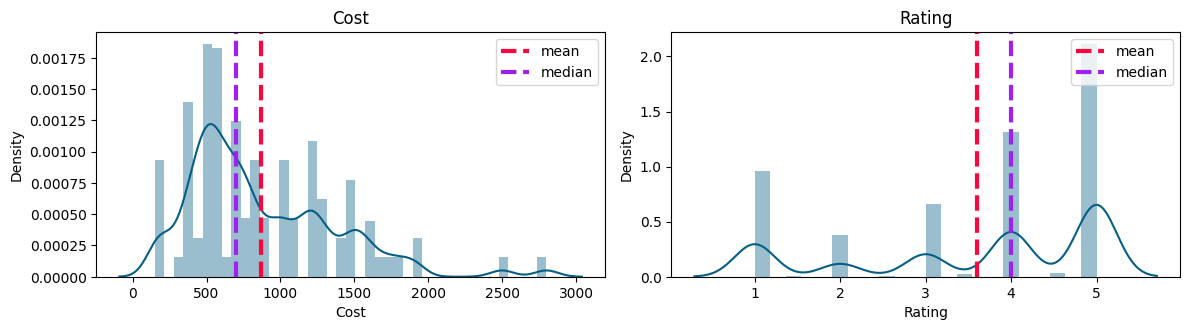

In [60]:
# Chart - 1 visualization code
plt.figure(figsize = (12,6));
for i,col in enumerate(['Cost','Rating']) :
 
    plt.subplot(2,2,i+1);
    sns.distplot(zomato_df[col], color = '#055E85');
    feature = zomato_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

####1. Why did you pick the specific chart?  
Distplot is helpful in understanding the distribution of the feature.



####2. What is/are the insight(s) found from the chart?   
All three are show skewness.
Maximum restaurant show price range for 500.
In 2018 number of reviews are more.


####3. Will the gained insights help creating a positive business impact?  
Price always place important role in any business alongwith rating which show how much engagement are made for the product.  
But in this chart it is unable to figure any impact on business when plotted all alone.

###Chart - 2 Pie Plot on Ratings & Cuisine Count Features (Univariate)

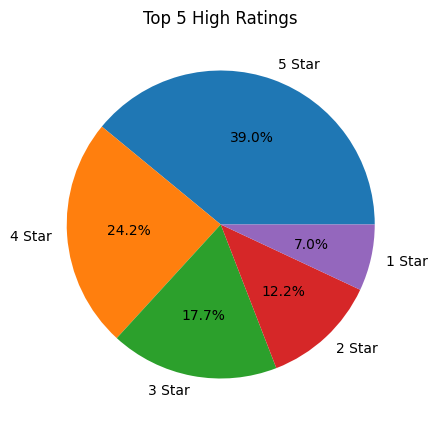

In [55]:
#plotting pie plot on Restrorant Ratings
plt.figure(figsize=(12,5))
x_label = reviews_df['Rating'].value_counts().index
y_label = reviews_df['Rating'].value_counts().values
palette_color = sns.color_palette('rocket_r')
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%')
plt.title('Top 5 High Ratings', color= 'black')
plt.show()

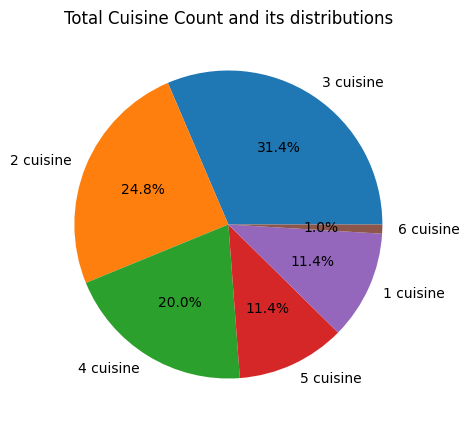

In [59]:
# Pie Plot of Total cuisine count & its distribution
cuisine_count = restro_df['cuisine_count'].value_counts().values
plt.figure(figsize=(8,5))
keys = ['3 cuisine', '2 cuisine', '4 cuisine', '5 cuisine', '1 cuisine', '6 cuisine']
plt.pie(x = cuisine_count, labels = keys, autopct='%1.1f%%')
plt.title('Total Cuisine Count and its distributions')
plt.show()

####1. Why did you pick the specific chart?  
The main purpose of using pie chart is to indicates a part-to-whole relationship in our data. The portions of the graph are proportional to the fraction of the total in each and every category. The complete "pie" represents a hundred proportion of a whole, while at the same time, the pie "slices" signify portions of the whole. It shows the total coverages covered by room types, neighbourhood group & neighbourhood.



####2. the insights found from the chart?  

*   From graph 1 it ia clear that most of the restaurant has 4 and 5 star of the rating which distribution is of 39% and 24.2%.
* Restaurant with 1 star is only 7% rating.
* From the graph 2, we can say that restaurants with 3 and 2 types of different cuisines has more number i.e. 32.1% and 24.1% distribution.
* While restaurant with 6 cuisine type has less number with 1% only.


####3. Will the gained insights help creating a positive business impact?   

Yes. We found that less number of different types of available cuisines may affect the restaurant's image as customers looks firstly about the different type of food as per their preference.

###Chart - 3 High and Low rated restaurants

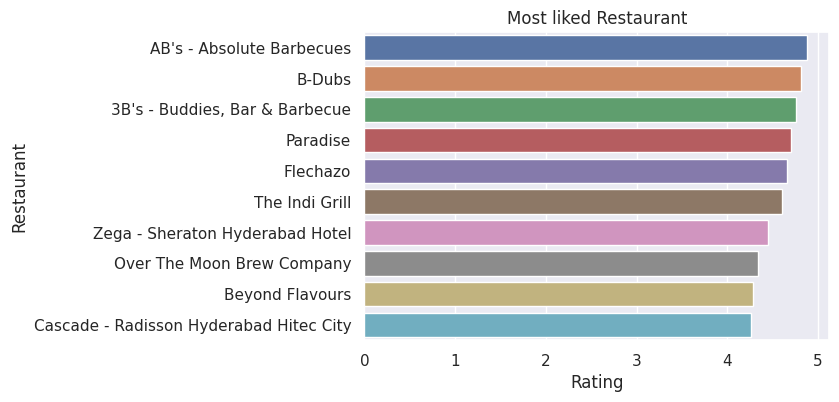

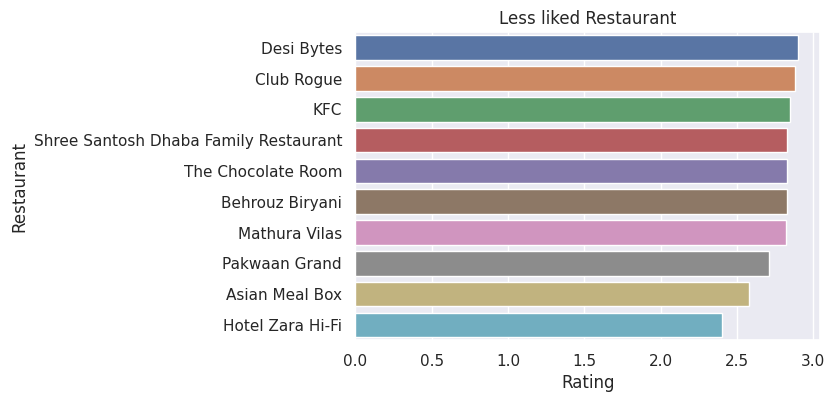

In [164]:
ratings_and_prices = hotel_df.groupby('Restaurant').agg({'Rating':'mean', 'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Cosing'})
ratings_df = ratings_and_prices.sort_values('Rating', ascending = False)
# plt.rcParams['figure.figsize']= (6,4)

# visualization code for most liked
sns.barplot(data = ratings_df[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most liked Restaurant')
plt.show()

#chart for less liked hotels
sns.barplot(data = ratings_df[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less liked Restaurant')
plt.show()

####1. Why did you pick the specific chart?
  I picked barplot for the above graph because it show frequency level for different category.


2.The insights found from the chart?   
AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.


####3. Will the gained insights help creating a positive business impact?

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.

###Chart - 4 Cosing for High Rated and Low Rated Hotels

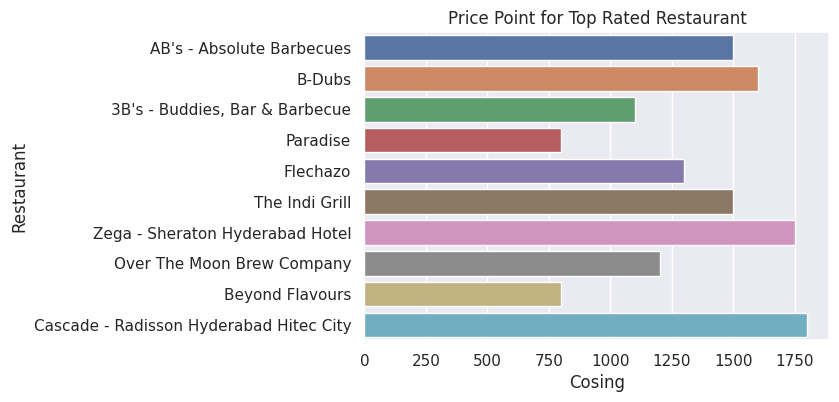

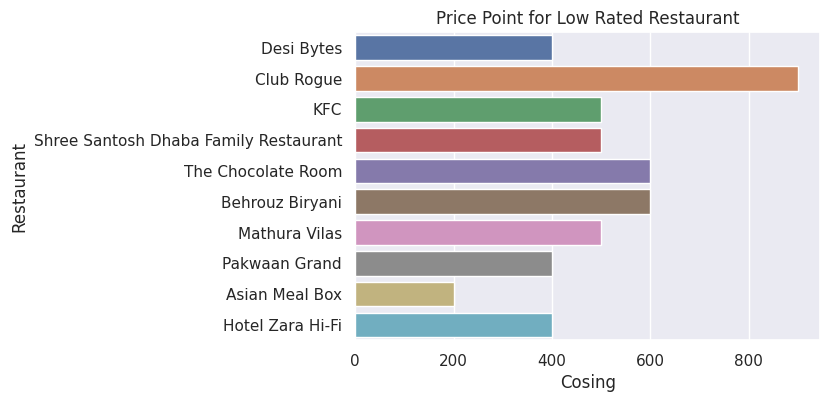

In [165]:
# Chart - 3 visualization code for prices of high rated restaurant
sns.barplot(data = ratings_df[:10], x = 'Cosing', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()


#visualization code for prices of low rated restaurant
sns.barplot(data = ratings_df[-10:], x = 'Cosing', y = 'Restaurant')
plt.title('Price Point for Low Rated Restaurant')
plt.show()

####1. Why did you pick the specific chart?
Here I choose barplot because bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart. Also, it allow to have a sense of the price range of each hotel and how they compare to each other.



####2. The insights found from the chart?
Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.



####3. Will the gained insights help creating a positive business impact?


Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.

Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.

Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.



###Chart - 5 - Popular Cuisines

In [79]:
# For loops to extract every single Cuisine name.
cuisine_list = restro_df.Cuisines.str.split(', ') 
cuisine_ = []
for names in cuisine_list:
  for name in names:
    cuisine_.append(name)
cuisine_series = pd.Series(cuisine_)    

In [81]:
# Creating DataFrame of Cuisines and their Counts.
cuisines = cuisine_series.to_fram e(name='Cuisines')
cuisines= cuisines.value_counts().reset_index()
cuisines.rename(columns={0: 'Count'}, inplace=True)
cuisines.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


Text(0.5, 1.0, 'Cuisines at Restaurants in Hyderabad (in order of Popularity)')

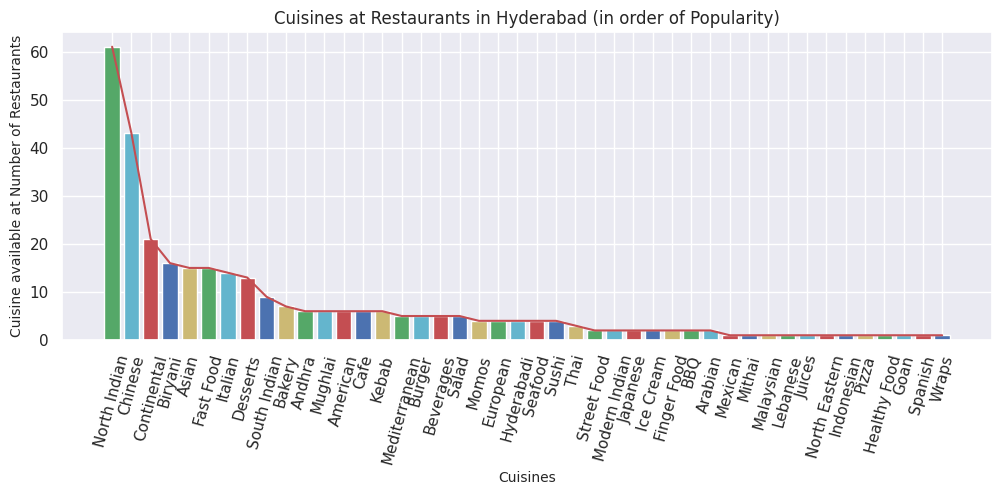

In [160]:
plt.figure(figsize=(12,4)) #setting size

plt.plot(cuisines.index,cuisines['Count'],color='r') #plottig line 
plt.bar(cuisines['Cuisines'],cuisines['Count'],color=['g','c','r','b','y']) # plotting bar graph
plt.xlabel('Cuisines',size=10)
plt.xticks(rotation=75)
plt.ylabel('Cuisine available at Number of Restaurants',size=10)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)',size=12)

####1. Why did you pick the specific chart?   
Bar graph helps us to clearly visualize highest 'n', lowest 'n' etc.



####2. What is/are the insight(s) found from the chart?
Despite South indian location, North Indian, Chinese are the two most popular cuisines in Hydrabad and presented in 40+ restaurants, The Famous Hyderabadi Biriyani is attributed as a cuisine in Itself and holds the 4th position, and Healthy food, Lebanese, Malaysian are the least popular in hydrabad as presenmted in only 1 or 2 restaurants, hydrabad has less demand for healthy food etc.



####3. Will the gained insights help creating a positive business impact?
Getting knowledge about the popular cuisines in the city helps restaurants to make better decisions about foods that are popular and that are high demanding, here we see a supply side view of the cuisines, there may be some hidden information presented abound demand by consumers that can be unvealed through further analysis.

###Chart - 6 Line Plot on Bivariate Data (Bivariate Analysis)

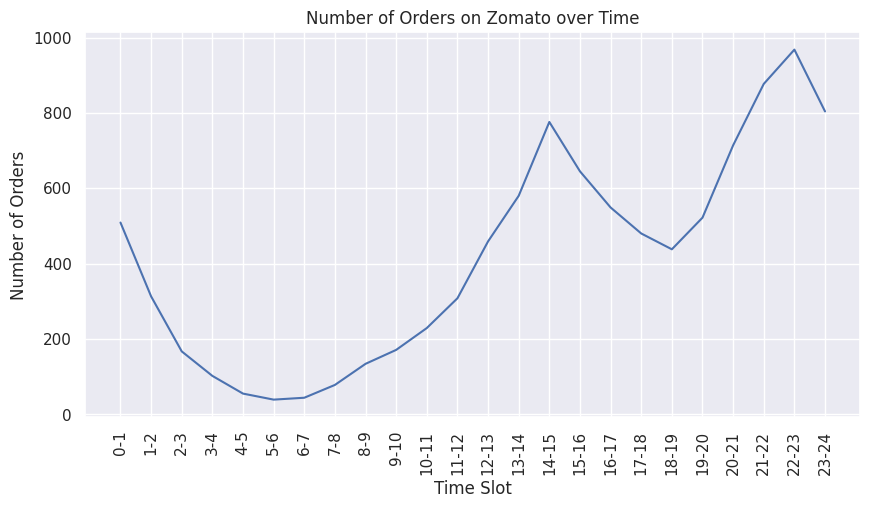

In [161]:
# GRAPH - 1
# create a dictionary to store the data
data = {'Time Slot': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
        'Number of Orders': [509, 313, 167, 102, 55, 39, 44, 78, 134, 171, 229, 308, 459, 580, 776, 645, 549, 480, 438, 522, 714, 877, 968, 804]}
df = pd.DataFrame(data)

# create a line plot using seaborn
plt.figure(figsize=(10,5))
sns.lineplot(x='Time Slot', y='Number of Orders', data=df)
plt.title('Number of Orders on Zomato over Time')
plt.xticks(rotation=90)
plt.show()

In [145]:
# Total count of ratings from 1 star to 5 star
ratings_df = reviews_df['Rating'].value_counts().reset_index()
ratings_df.rename(columns={'index': 'Ratings'}, inplace=True)
ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
ratings_df

,Ratings,Count
0,5.0,3832
1,4.0,2373
2,1.0,1735
3,3.0,1193
4,2.0,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9


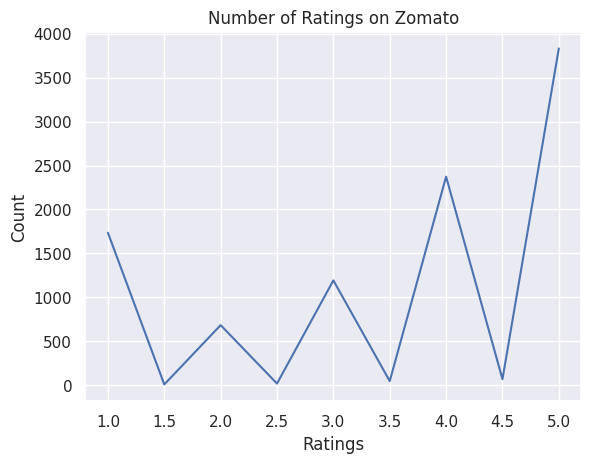

In [146]:
# create a line plot on ratings
sns.lineplot(x='Ratings', y='Count', data= ratings_df)
plt.title('Number of Ratings on Zomato')
plt.show()

####1. Why did you pick the specific chart?
A line plot is a type of graph that displays data using a number of connected points or markers, connected by straight lines. It is commonly used to visualize relationships between two different variables. Line plots are useful for assessing trends and patterns in data and can be used to compare multiple sets of data.





####2.The insighs found from the chart?

From graph 1, we can infer that most of the people orders food between 3PM to 4PM and 10PM to 11PM. Least number of order is between 3AM to 7AM may be because of very early morning timing.   
From graph 2, we can see that 5 star rating has more number of count than 4 star. Ratings from 4.5 star to 1.5 star has least and similar number of count.


####3. Will the gained insights help creating a positive business impact?

Yes. We can see the peak hours for order on zomato app. From this perspective, we can suggest zomato to throw more offer at this timings so that zomato can increse their order number and their cutomers.

###Chart - 7 - Cost vs Rating

Text(0.5, 1.0, 'Relation between Rating & Cost of Restaurant')

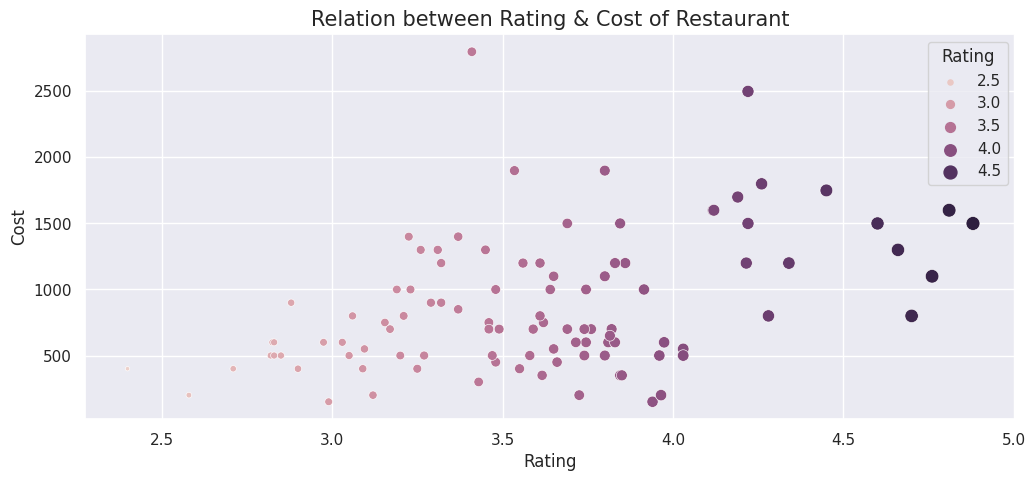

In [123]:
plt.figure(figsize=(12,5)) # setting size
merge_grupby = hotel_df.groupby('Restaurant').agg({'Cost':'mean', 'Rating':'mean'}).reset_index()
# plotting scatter plt shwoing relation between 2 features
sns.scatterplot(data=merge_grupby, x='Rating',  y='Cost', size='Rating', sizes=(10, 100), hue="Rating")

plt.title('Relation between Rating & Cost of Restaurant', size=15)

####1. Why did you pick the specific chart?
Scatterplot is best to use when we need to define Dependence or independence of 2 variables or need to know any relationship between variables.



####2. What is/are the insight(s) found from the chart?
In this data less than 3.0 ratings are only for low cost restaurants and higher ratings are only for restaurants costs more than 800, this looks like a relation between cost and ratings.



####3. Will the gained insights help creating a positive business impact?

It looks like hydrabad's restaurants is sensitive to their price, as we see a pattern of low rating in low cost restaurants, there can be quality issues with the low cost restaurants moreover we have only a sample of restaurants, however given the rich nature of city, it looks logicaly correct, so this report helps restaurants to wiork on their price points and make more strategic decision.

###Chart - 8 - Correlation Heatmap (Multivariate)

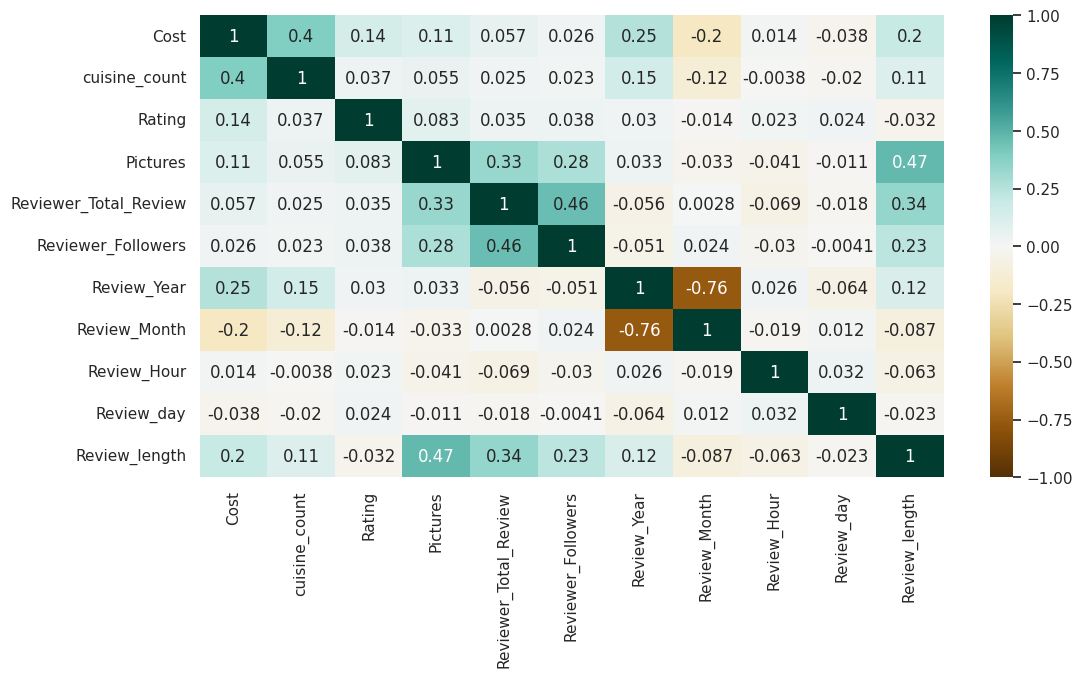

In [170]:
# Correlation Heatmap visualization code
correlation = zomato_df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation, cmap = 'BrBG', annot = True, vmin = -1, vmax=1)
plt.show()

####1. Why did you pick the specific chart?  
A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.



####2. The insights found from the chart?

There are 46% of positive correlation b/w Review_count and Followers.
There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.
There are also 33% of positive correlation b/w review_count and pictures.
we conclude that there is no strong correlation between any variables